# Analysis of testData2

**Author**: Jacopo Ventura

**Date**: 23rd October 2017

A predictive model for the feature $t$ is build through the following steps:

1. import data and perform descriptive statistics
2. first plots of the data to get insights
3. check linear correlation
4. separate training and test sets
5. train few machine learning algorithms and select the best one 
6. outliers removal
7. train again the chosen machine learning algorithm without outliers
8. test the algorithm on the test dataset

In [3]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd     # Pandas: python library for large data manipulation and analysis. 
                        # Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt

# this command is very important in Jupyter: figures must be showed directly in the notebook!!!
%matplotlib inline

# disable warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# step 1: acquire dataset
data_path='C:/Users/jacopo/Desktop/schaeffler/testData2.csv'
dataset = pd.read_csv(data_path,sep=';')   # dataset as pandas dataset

print('Overview of the dataset: size of dataset and type of data:\n')
dataset.info()

print('\nDescriptive statistics of the dataset:')
dataset.describe()

Overview of the dataset: size of dataset and type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
a    1000 non-null float64
b    1000 non-null float64
c    1000 non-null float64
d    1000 non-null float64
e    1000 non-null int64
f    1000 non-null int64
t    1000 non-null float64
dtypes: float64(5), int64(2)
memory usage: 54.8 KB

Descriptive statistics of the dataset:


,a,b,c,d,e,f,t
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,170.114480,4550.159770,40.401890,172.13218,2.97300,3.571000,57.256710
std,63.522191,1594.045709,22.744745,76.36400,1.43399,2.288711,35.173018
min,60.110000,1615.130000,0.080000,40.03000,1.00000,0.000000,-164.020000
25%,115.222500,3185.995000,20.187500,105.71000,2.00000,2.000000,41.805000
50%,169.555000,4491.455000,39.910000,172.44000,3.00000,3.500000,52.365000
75%,224.187500,5911.387500,60.512500,238.74500,4.00000,6.000000,63.987500
max,279.540000,7483.760000,79.830000,299.89000,5.00000,7.000000,305.530000


t    1.000000
b    0.305322
a    0.304193
e    0.025271
d    0.022822
f   -0.075959
c   -0.277344
Name: t, dtype: float64
Scatter matrix of data:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CEC48F198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027CEDB21208>]], dtype=object)

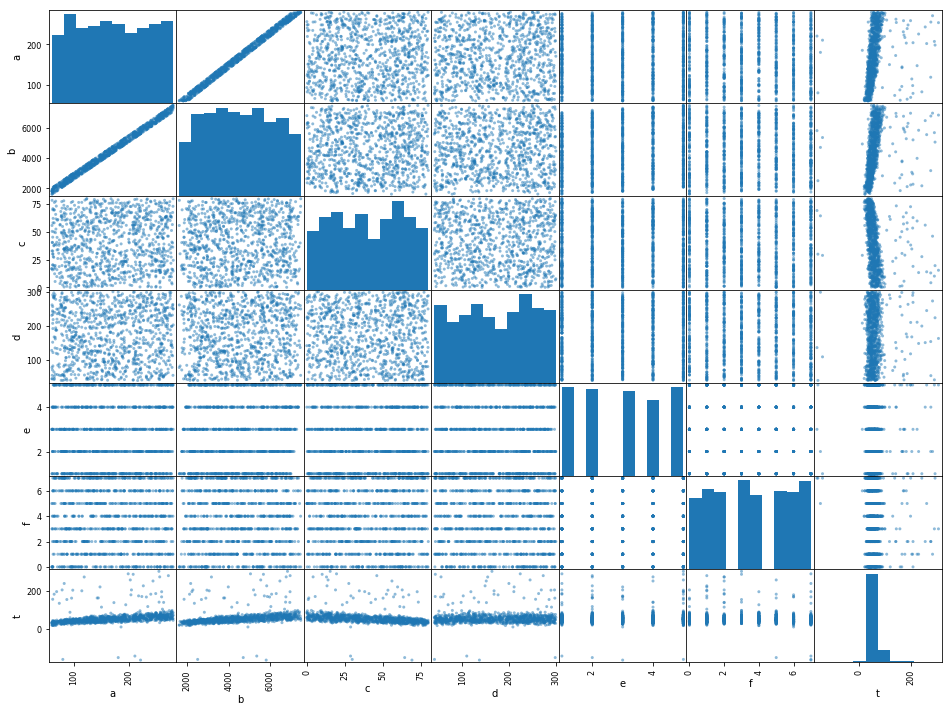

In [5]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

# check linear correlation through Pearson's r
corr_matrix = dataset.corr()
print(corr_matrix["t"].sort_values(ascending=False))

print('Scatter matrix of data:')
scatter_matrix(dataset, figsize=(16, 12))

Display correlation matrix


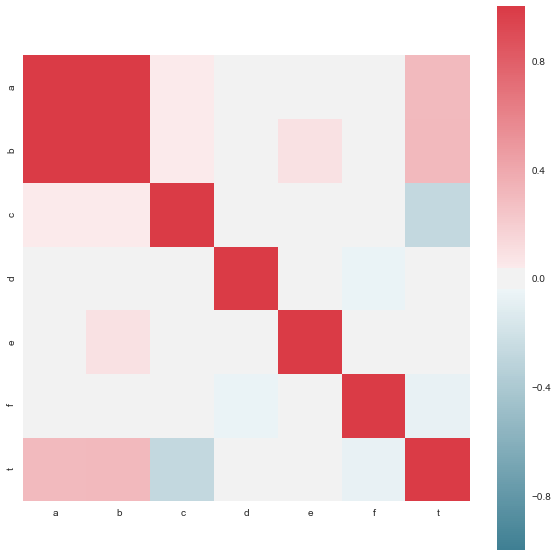

In [23]:
import seaborn as sns

print('Display correlation matrix')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1).fit(dataset[['a','b']])

print('variance along the principal xes:')
print(pca.explained_variance_ratio_)

data_transformed = pca.transform(dataset[['a','b']])

variance along the principal xes:
[ 0.99998719]


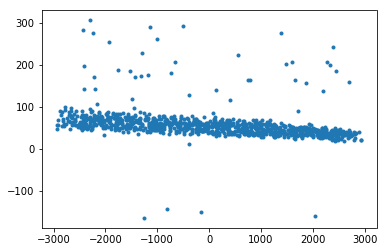

In [17]:
plt.scatter(data_transformed,dataset['t'],marker='.')

variance along the principal xes:
[ 0.91854106]


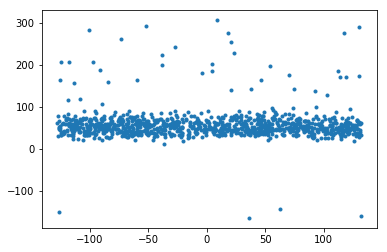

In [22]:
pca = PCA(n_components = 1).fit(dataset[['c','d']])

print('variance along the principal xes:')
print(pca.explained_variance_ratio_)

data_transformed2 = pca.transform(dataset[['c','d']])

plt.scatter(data_transformed2,dataset['t'],marker='.')